In [1]:
import numpy as py
import pandas as pd

In [2]:
import cv2
import PIL
import matplotlib.pylab as plt
import glob

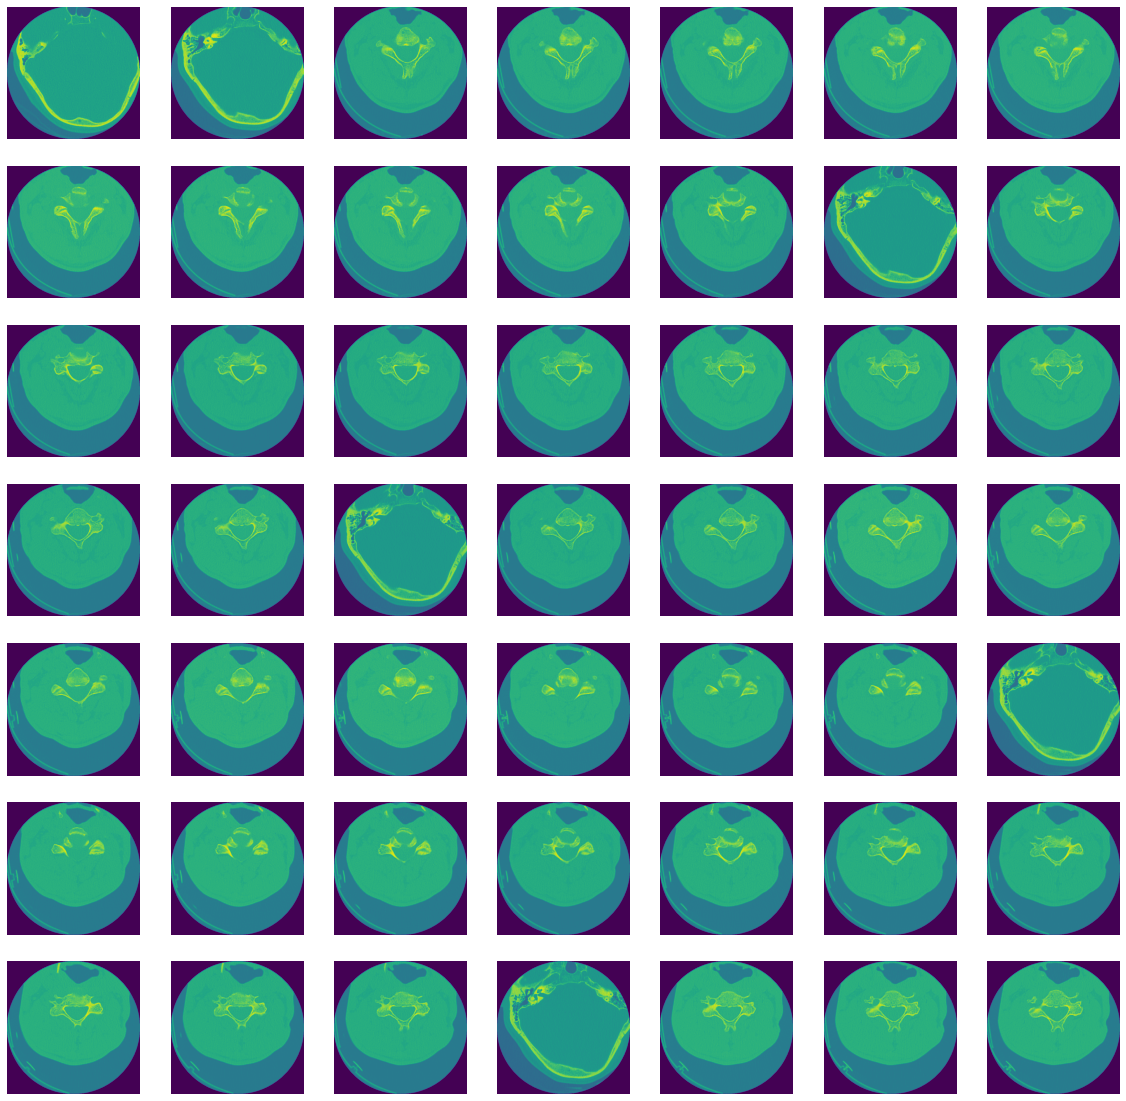

In [3]:
import pydicom as dicom

image_file = glob.glob("../../data/RSNA 2022 CSF detection/train_images/1.2.826.0.1.3680043.10001/*.dcm")
plt.figure(figsize=(20, 20))

for i in range(49):
    ax = plt.subplot(7, 7, i + 1)
    # specify your dcm image path
    image_path = image_file[i]
    ds = dicom.dcmread(image_path)
    plt.axis('off')
    
    plt.imshow(ds.pixel_array)

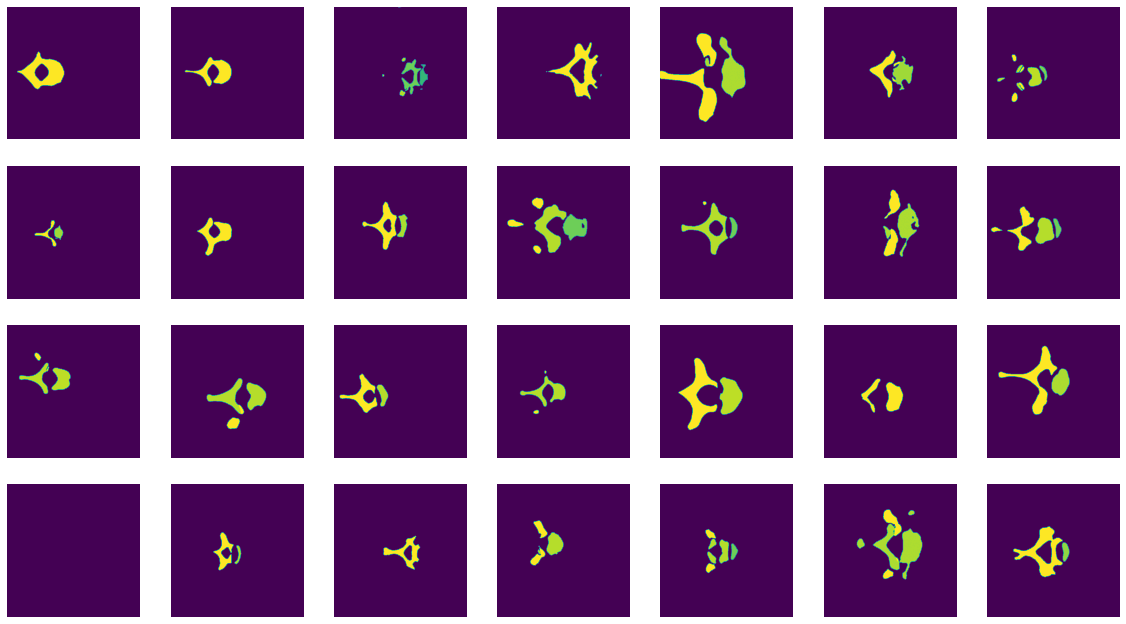

In [4]:
import nibabel as nib

image_file = glob.glob("../../data/RSNA 2022 CSF detection/segmentations/*.nii")
plt.figure(figsize=(20, 20))

for i in range(28):
    ax = plt.subplot(7, 7, i + 1)
    # specify your nii image path
    image_path = image_file[i]
    nii_img = nib.load(image_path).get_fdata()
    nib_image = nii_img[:,:,59]
    plt.axis('off')
    plt.imshow(nib_image)

In [5]:
train_df = pd.read_csv("../../data/RSNA 2022 CSF detection/train.csv")
test_df = pd.read_csv("../../data/RSNA 2022 CSF detection/test.csv")
sample_submission = pd.read_csv("../../data/RSNA 2022 CSF detection/sample_submission.csv")
bounding_boxes = pd.read_csv("../../data/RSNA 2022 CSF detection/train_bounding_boxes.csv")

In [6]:
train_df

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
0,1.2.826.0.1.3680043.6200,1,1,1,0,0,0,0,0
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0
3,1.2.826.0.1.3680043.12351,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
2014,1.2.826.0.1.3680043.21684,1,0,1,0,0,0,1,1
2015,1.2.826.0.1.3680043.4786,1,0,0,0,0,0,0,1
2016,1.2.826.0.1.3680043.14341,0,0,0,0,0,0,0,0
2017,1.2.826.0.1.3680043.12053,0,0,0,0,0,0,0,0


In [7]:
test_df

,row_id,StudyInstanceUID,prediction_type
0,1.2.826.0.1.3680043.10197_C1,1.2.826.0.1.3680043.10197,C1
1,1.2.826.0.1.3680043.10454_C1,1.2.826.0.1.3680043.10454,C1
2,1.2.826.0.1.3680043.10690_C1,1.2.826.0.1.3680043.10690,C1


In [8]:
sample_submission

,row_id,fractured
0,1.2.826.0.1.3680043.10197_C1,0.5
1,1.2.826.0.1.3680043.10454_C1,0.5
2,1.2.826.0.1.3680043.10690_C1,0.5


In [9]:
bounding_boxes

,StudyInstanceUID,x,y,width,height,slice_number
0,1.2.826.0.1.3680043.10051,219.27715,216.71419,17.30440,20.38517,133
1,1.2.826.0.1.3680043.10051,221.56460,216.71419,17.87844,25.24362,134
2,1.2.826.0.1.3680043.10051,216.82151,221.62546,27.00959,26.37454,135
3,1.2.826.0.1.3680043.10051,214.49455,215.48637,27.92726,37.51363,136
4,1.2.826.0.1.3680043.10051,214.00000,215.48637,27.00000,43.51363,137
...,...,...,...,...,...,...
7212,1.2.826.0.1.3680043.9940,297.23186,115.53983,85.18228,66.52623,140
7213,1.2.826.0.1.3680043.9940,298.00000,117.00000,86.00000,61.00000,141
7214,1.2.826.0.1.3680043.9940,298.00000,119.00000,87.00000,58.00000,142
7215,1.2.826.0.1.3680043.9940,299.00000,120.00000,89.00000,56.00000,143


In [10]:
train_df.describe()

,patient_overall,C1,C2,C3,C4,C5,C6,C7
count,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000
mean,0.475978,0.072313,0.141159,0.036157,0.053492,0.080238,0.137197,0.194651
std,0.499546,0.259070,0.348272,0.186726,0.225068,0.271728,0.344140,0.396030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
